# Wrangling WeRateDogs

### Introduction : project motivation
In this project I'm going to gather, asses, clean, store and finally analyze and visualize data relative to the WeRateDogs twitter account. <br>
Usually images of dogs are posted on this account to be rated according to a particular fractional system where every dog or sometimes some other animal receives a score in tenths (like 9/10), but the score can be greater than one (or ten tenths) as value, so scores like 11/10 or 20/10 are valid scores.<br>
 
WeRateDogs is a website strongly based on humour about dogs and pets, so sometimes the images posted aren't really of a dog, nor of an animal. <br>

I'll wrangle three source of data: a csv file containing an archive of tweets by WeRateDogs, a tsv file obtained from an url provided by Udacity, containing predictions about the most probable race of dogs contained in the images and finally I'll extract additional data about the tweets contained in the twitter archive directly from Twitter using the Tweepy API. <br>

On Twitter messagges can be retweeted by other users, but for the purpose of this project I'll keep only data about original tweets with an image (as per instructions on Udacity) and a score, while I'll remove retweeted tweets, so not original tweets.

### Summary
#### - [Gathering](#gathering)
   - [Gathering data from file: importing the WeRateDogs Twitter archive](#gathering_from_file)
   - [ Gathering data from url: retrieving the image predictions ](#gathering_from_url)
   - [Gathering data from Twitter with the Tweepy API](#gathering_from_tweepy)

#### -[ Assessing](#assessing)
   - [Assessing the twitter_archive dataframe](#assessing_twitter_archive)
   - [Tidiness and Quality issue for the twitter_archive dataframe](#tidy_quality_ta)
   - [Assessing the image_predictions dataframe](#assessing_image_predictions)
   - [image_predictions dataframe issues](#image_predictions_issues)
   - [Assessing the tweet_extra dataframe](#assessing_tweet_extra)
   - [tweet_extra dataframe issues](#tweet_extra_issues)
     
#### - [Cleaning](#cleaning_section) 
   - [Cleaning the twitter_archive_dataframe](#cleaning_twitter_archive)
   - [Cleaning the image_predictions dataframe](#cleaning_image_predictions)
   - [Cleaning the tweet_extra dataframe](#cleaning_tweet_extra)
   
#### - [Saving the cleaned dataframe to a csv file](#saving_csv)   

#### - [Analyzing and Visualizing](#analyzing_and_visualizing)

In [1]:
### imports
import pandas as pd
import numpy as np
import tweepy 
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='gathering'></a>
## Gathering 

<a id='gathering_from_file'></a>
### Gathering data from file: importing the WeRateDogs Twitter archive
An archive of tweets from WeRateDogs has already been provided as csv file and it will be imported in the next cell.


In [2]:
#importing the WeRateDogs twitter archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

<a id= '#gathering_from_url'></a>
### Gathering data from url: retrieving the image predictions

In the following cell, I'll download a tsv file from a url provided by Udacity, containing predictions on the race of cat and dogs in photos included in tweets.

In [542]:
predictions_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [543]:
response = requests.get(predictions_url)

In [490]:
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [3]:
image_predictions = pd.read_csv("image-predictions.tsv", sep="\t")

<a id='gathering_from_tweepy'></a>
### Gathering data from the Twitter with the Tweepy API
## NOTA: RIMUOVI LE API KEY PRIMA DI MANDARE QUESTO NOTEBOOK!!

In the following cells I'll download data about the count of retweets and and favorites for every tweet included in the twitter_archive dataframe.

In [492]:

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
## create an API object and set wait_on_rate_limit to True in order to not exceed the rate limits for querying the api,
## while wait_on_rate_limit_notify set to True will print a statement informing if waiting (because rate limit exceeded)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify= True)

The following cell download data from the Twitter with the Tweepy API.<br>
Some of the tweets in the twitter_archive may not be still on Twitter: the orginal author may have deleted the tweet or the entire account, in this case the Tweepy API will throw an exception that will be captured in a try-catch block.<br>


In [494]:
### running this cell could take 35 minutes or more
import time
start = time.time()
with open('tweet_json.txt', mode = 'w', encoding='utf-8') as file:
 
    for index, row in twitter_archive.iterrows():
       
        tweet_id = row.tweet_id
        data ={}
        try:  
           
            current_tweet = api.get_status(tweet_id, tweet_mode='extended')
            data['tweet_id'] = tweet_id
            data['retweet_count'] = current_tweet.retweet_count
            data['favorite_count'] = current_tweet.favorite_count
            data['is_valid_tweet'] = True
            
           
       ### catch both error for not existing tweet and rate limit error
        except tweepy.TweepError as e:
            data['tweet_id'] = tweet_id
            ### if is_valid_tweet is False, it hasn't be possible to retrieve the tweet from twitter.
            data['is_valid_tweet'] = False
            print("id: " + str(tweet_id) + " " + e.response.text)
            
        json.dump(data, file)
        file.write('\n')  
            
end = time.time()
print(end - start)

id: 888202515573088257 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 873697596434513921 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 872668790621863937 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 869988702071779329 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 866816280283807744 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 861769973181624320 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 845459076796616705 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 842892208864923648 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 837012587749474308 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 827228250799742977 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 812747805718642688 {"errors":[{"code":144,"message":"No status found with that ID."}]}

Rate limit reached. Sleeping for: 350


id: 754011816964026368 {"errors":[{"code":144,"message":"No status found with that ID."}]}
id: 680055455951884288 {"errors":[{"code":144,"message":"No status found with that ID."}]}


Rate limit reached. Sleeping for: 416


2168.095754623413


In [4]:
### reading json data to dataframe
tweet_extra = pd.read_json("tweet_json.txt", lines=True,encoding='utf-8')

<a id='assessing'></a>
## Assessing 

<a id= "assessing_twitter_archive"> </a>
### Assessing the twitter archive dataframe

In [600]:
twitter_archive.shape

(2356, 17)

In [601]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [602]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are 2356 rows and 17 columns in the twitter_archive dataframe, some of the columns are mostly empty (only 78 values for in_reply_to_status_id and in_reply_to_user_id and 181 for retweeted_status_id and retweeted_status_user_id ) and some of the types of the columns seem not appropriate: float used for columns dedicated to ids, but according to the twitter API this fields should be int.

In [603]:
#Looking at the values in source
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Looking at the values for the source, the format for the source is inappropriate: it contains tags that aren't particularly useful for classification, the data could be simplified to  "Twitter for iPhone", "Vine", "Twitter Web Client" and "TweetDeck". The source sites included aren't again particularly useful: <br>
- https://about.twitter.com/products/tweetdeck  simply invites to download the iPhone app
- http://vine.co is what remains  the Vine company website that stopped working in 2017 and it is a dead end
- http://twitter.com it is simply the twitter homepage
- https://about.twitter.com/products/tweetdeck  this redirects to the twitter homepage.

It seems the information about the websiste could be removed without any particular loss of information about the source,because the website aren't particurlarly informative, we only need to know there are four different sources.

In [604]:
## the timestamp is a string 
print(type(twitter_archive.timestamp[0]))

<class 'str'>


The type of the timestamp column is string, not useful for ordering and comparisons.

In [605]:
### looking at dog names
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Buddy             7
Toby              7
Bailey            7
Daisy             7
an                7
Stanley           6
Oscar             6
Scout             6
Rusty             6
Milo              6
Leo               6
Dave              6
Jax               6
Jack              6
Bella             6
Koda              6
Bentley           5
               ... 
Gòrdón            1
Geno              1
Bodie             1
Willem            1
Nugget            1
Beckham           1
Crawford          1
Mike              1
Bode              1
Cal               1
Aldrick           1
Divine            1
Emmie             1
Walker            1
Kody              1
Wafer             1
Doobert           1
Bauer             1
Miguel            1


There are 55 dogs with name "a", which is a very improbable name, let's look at those and to dogs with name "an" and "the".

In [606]:
wrong_names = twitter_archive[(twitter_archive.name == 'a' )| (twitter_archive.name == 'an') |\
                              (twitter_archive.name == 'the')]

In [607]:
for index, row in wrong_names.iterrows():
    print(str(index) + " : " + row.text )

56 : Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649 : Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
759 : RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
801 : Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002 : This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004 : Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017 : This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10

It seems the name of the dog has been obtained extracting the word after "This is" which for the tweets above is the article "a" or "an" or "the".

In [608]:
### rating denominator should be 10
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Some of the denominators are different from 10, they may be errors or simply unconventional scores,  let's look at those

In [609]:
df_den_not_10= twitter_archive[twitter_archive.rating_denominator != 10]

In [610]:
df_den_not_10.shape

(23, 17)

In [611]:
for index,  row in df_den_not_10.iterrows():
    print(str(index) + " " + row.text)

313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342 @docmisterio account started on 11/15/15
433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202 

As expected some of the scores aren't real scores and some of them are scores, but inconsistent with a format in tenths.

Let's now look at the numerator

In [612]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

There are some strange values here as well, let's look at votes greater than 20, a value that seem a bit off (even for a loyal dog).

In [613]:
df_over_20 = twitter_archive[twitter_archive.rating_numerator >20]

In [614]:
for index, row in df_over_20.iterrows():
    print(str(index) + " : " + row.text)

188 : @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189 : @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
290 : @markhoppus 182/10
313 : @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
340 : RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
433 : The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516 : Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695 : This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
763 : This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appe

Some of the scores are really super high, some aren't scores at all and some aren't  about dogs (like the one at index 2074 which is about a singer with the word "dog" in his name, Snoop Dogg).

In [615]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


There are four columns for indicating the stage of the dog: doggo, floofer, pupper, puppo. Let's give a look at their content.

In [616]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [617]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [618]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [619]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [620]:
print(twitter_archive.doggo[0])
print(type(twitter_archive.doggo[0]))

None
<class 'str'>


It seems most of the dog aren't classified in one of the four categories, in any case these four columns should be just one, because they represent one variable, the stage of the dog.<br>
There is also a quality problem reguarding these 4 columns: the value None is represented as string and this can cause problems, as showed in the following cell:

In [621]:
#showing that despite the presence of many None as values, they don't show up as null
print(twitter_archive.doggo.isnull().any())

False


Let's now check if there are tweets with dogs labeled for more than one stage (a doggo who is also a puppo etc).

In [622]:
#transforms boolean in int i
doggos = np.array(twitter_archive.doggo != 'None', dtype = int)
floofer = np.array(twitter_archive.floofer != 'None', dtype = int)
puppo = np.array(twitter_archive.puppo != 'None', dtype = int)
pupper = np.array(twitter_archive.pupper != 'None', dtype = int)


In [623]:
dog_sum = doggos + floofer + puppo + pupper

In [624]:
# summing the dog stage categories
dog_sum = doggos + floofer + puppo + pupper

In [625]:
dog_sum = pd.Series(dog_sum)

In [626]:
dog_sum.value_counts()

0    1976
1     366
2      14
dtype: int64

There are 14 values with 2 indications for the dog stage, as can be seen in the following cells:

In [627]:
multi_stage_clean = twitter_archive[dog_sum > 1][['doggo', 'floofer', 'pupper', 'puppo', 'tweet_id']]
multi_stage_clean

,doggo,floofer,pupper,puppo,tweet_id
191,doggo,None,None,puppo,855851453814013952
200,doggo,floofer,None,None,854010172552949760
460,doggo,None,pupper,None,817777686764523521
531,doggo,None,pupper,None,808106460588765185
565,doggo,None,pupper,None,802265048156610565
575,doggo,None,pupper,None,801115127852503040
705,doggo,None,pupper,None,785639753186217984
733,doggo,None,pupper,None,781308096455073793
778,doggo,None,pupper,None,775898661951791106
822,doggo,None,pupper,None,770093767776997377


Some of these tweets may contain really more than one dogs, while for other tweets maybe there is some sort of word pun, word jokes are very common on WeRateDogs, so these tweets need to be assessed visually (both reading the text and looking at the pictures).

Results of the visual assessment, on the left the row index: <br>
191--> puppo <br>
200 --> doggo <br>
460 --> pupper <br>
531 --> doggo + pupper <br>
565 --> doggo + pupper <br>
575 --> pupper <br>
705 --> it isn't a dog, it is a hedgehog , I'll remove this tweet <br>
733 --> doggo + pupper <br>
778 --> doggo + pupper <br>
822 --> doggo + pupper <br>
889 --> doggo + pupper <br>
956 --> The text of this tweet doesn't really assess the stage of the dog, it invites to stop to post pictures without dogs in it, so I'll set this to null<br>
1063 --> doggo + pupper <br>
1113 --> doggo + pupper

We want only tweets with at least one image, every tweet with an image contains an url starting with  https://t.co/ , let's  now see how many tweets have an image in twitter_archive

In [628]:
sum(twitter_archive.text.str.contains("https://t.co/"))

2231

There are 2356 rows in twitter archive,but only 2231 contains an url for a photo, let's look at those tweet texts to confirm they don't contain an url to an image.

In [629]:
tweet_with_photos = twitter_archive.text.str.contains("https://t.co/")

In [630]:
tweet_no_photos = -tweet_with_photos

In [631]:
no_photos_df = twitter_archive[tweet_no_photos]

In [632]:
 for index, tweet in no_photos_df.iterrows():
        print(str(index) + " : " + tweet.text)
        
        

30 : @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
55 : @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
64 : @RealKentMurphy 14/10 confirmed
68 : RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…
73 : RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below

https:/…
91 : RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…
97 : RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below

https:/…
101 : RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…
113 : @ComplicitOwl @Sho

All the tweets above don't contain a valid url or don't contain an url at all, so they need to be removed.

<a id="tidy_quality_ta"> </a>
### Tidiness and Quality issue for the twitter_archive dataframe

#### twitter_archive dataframe quality issues
1) The tweets with a value different from NaN for  the columns retweeted_status_id or retweeted_status_user_id are retweets and not original tweets and need to be removed from the dataframe  <br>
2) Some of the tweets may be no longer on twitter, because eliminated by their author or for other reasons, so they should be removed from the dataframe using the column is_valid_tweet in the tweet_extra dataframe. <br>
3) Some of the columns don't contain an image for a dog (or other pet) so they need to be removed. <br>
4) Some of the columns are meant to contain ids for tweets, but they are in float format which is unsuitable for queries a to the Twitter API and for comparisons, so the need to be converted to integers, such columns are: <br>
 - in_reply_to_status_id  <br>
 - in_reply_to_user_id <br>
Other columns have the same problem, but they will be removed, so they won't be converted( retweeted_status_id,     retweeted_status_user_id, retweeted_status_timestamp) <br>

5) The Timestamp column is in string format, it should be a datetime object to be useful for comparison and extracting months, days, years and so on. <br>
6) The source column contains useless hmtl tags that make diffucult to read the content of the cell and aren't informative.<br>
7) The rating numerator and rating denominator contain numbers that aren't real scores for dogs, but errors and some of the scores are incosistent with a scoring in tenths so they need to be converted to tenth in order to have a conistent system of scoring. <br>
8) The name column with the name of the dogs contain wrong names, 55 columns have a dog name of just "a",other are just "a" or "the",  but this is probably an error in extracting the name of the dog from the tweet. <br>
9) The four columns with the stage of the dog (doggo, fluffer, puppo and pupper) have null values represented as strings, so there is the string 'None' instead of a NaN value for rows where there is no indication of the stage of the dog: this makes difficult to check for nullity of values, because no row is null when containing the string 'None'.  'None'string values should be converted to  NaN.

#### twitter_archive dataframe tidiness issues

1) Three columns describing the stage of the dog (doggo,floofer,pupper,puppo), but this is just one variable, so there should be only one colum <br>
2) Two columns for the score for a pet, rating_numerator and rating_denominator, they refer to the same element, a score, so this should be just one column dog_score<br>
3) The columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are useful only for identifying tweets that are retweets, so they will be removed in the final cleaned dataframe with no retweets.

<a id ="assessing_image_predictions"> </a>
### Assessing the image_predictions dataframe

The image_predictions dataframe contains predictions about the content of images included in tweets. 

The columns p1, p2 and p3 give possible predictions about the content of the image. <br>
The columns p1_conf, p2_conf and p3_conf give the probability that the image is what described respectively in p1, p2 and p3.<br>
The columns p1_dog, p2_dog and p3_dog are columns of boolean indicating if the image is of a dog.

In [633]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [634]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [635]:
image_predictions.shape

(2075, 12)

The image_predictions dataframe has less rows than the twitter_archive dataframe. Some of the tweets in tweets in twitter_archive are short videos from vine, so they probably hasn't been assessed by the neural network as images, as we can see in the following cells.

In [636]:
####  tweet_id from twitter_archive
ta_tweet = twitter_archive.tweet_id

In [637]:
#### tweet_id from image_predictions
img_tweet = image_predictions.tweet_id

In [638]:
### tweet_id present in twitter_archive, but not in image_predictions
diff1 = np.setdiff1d(ta_tweet, img_tweet)

In [639]:
#### dataframe of rows present in twitter_archive but not in image_predictions
tweet_not_in_image_predictions = twitter_archive[twitter_archive.tweet_id.isin(diff1)]

In [640]:
### let's see what are the sources for tweets present in twitter_archive, but not in image_predictions,
## they are mostly vine.
tweet_not_in_image_predictions.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    187
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      3
Name: source, dtype: int64

In [641]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
Shetland_sheepdog             18
teddy                         18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [642]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [643]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

Clearly there is an inconsistency in the string representation of the race of the dog: sometimes the string is capitalized othe times it isn't (for example golden_retriever and Labrador_retriever). <br>
The names have underscore between words and this is not useful, so I'll remove them.
Some of the names aren't races of dog at all and this proabably happens when the photo has more than one element inside and not only a dog, for example p1 for the entry 1130 is handkerchief https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg, while on p2 and p3 there is a race of dog(pomeranian and Shih-Tzu): the photo is a picture of a dog sleeping over some fabric.

In [644]:
# a look at an handkerchief that may be a dog (or viceversa)
image_predictions[image_predictions.p1 == 'handkerchief']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1130,728035342121635841,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True


Let's give a look to the numerical values in the dataframe

In [645]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


At first look the numerical values seem to be correct: the values for p1_conf, p2_conf and p3_conf are between values close to zero and 1, so they are valid possible values for a probability. <br>
p1_conf should always be greater than or equal to  p2_conf and p3_conf,  and  p2_conf should be greater than or equal of p3_conf, let's see if it's true.


In [646]:
sum(image_predictions.p1_conf >= image_predictions.p2_conf)

2075

In [647]:
sum(image_predictions.p1_conf >= image_predictions.p3_conf)

2075

In [648]:
sum(image_predictions.p2_conf >= image_predictions.p3_conf)

2075

Tha data about the probabilities seem to be correct in p1_conf, p2_conf and p3_conf, p1_conf is always greater or equal than p2_conf and p2_conf is always greater or equal than p3_conf.

<a id="image_predictions_issues"> </a>
### image_predictions dataframe issues

#### image_predictions dataframe quality issues
1) Inconsistent representation of the content of the image in p1, p2 and p3: the content is sometimes capitalized and other times it isn't, furhtermore the strings in p1, p2 and p3 contain underscores that can be removed for better reading. <br>
2) Some of the rows may be from retweeted tweets, so they need to be removed, I'll also remove every tweet with a tweet_id that has already been removed from twitter_archive for any reason during the cleaning process.


#### Tidiness issues
1) The image predictions dataframe can be merged to the twitter_archive dataframe in a twitter_main dataframe. Some of the tweets in the image_predictions dataframe won't be present in twitter_archive: some of the tweets in twitter_archive are  short videos from vine, so they probably haven't been assessed for predictions.

<a id ="assessing_tweet_extra"> </a>
### Assessing the tweet_extra dataframe

The tweet_extra dataframe has been created downloading data from the Twitter API with the help of the Tweepy library. <br>
The dataframe contains additional data about the tweets contained in the twitter_archive dataframe.<br>
The favorite_count columns represents the number of times a tweet has ben favored.<br>
The retweet count represents the number of times a tweet has been retweeted.<br>
The is_valid_tweet column represent if the tweet is still on Twitter, some of the tweets in the twitter archive may not accessible anymore, maybe because deleted by the author or because the author account doesn't exist anymore.

In [649]:
tweet_extra.head()

,favorite_count,is_valid_tweet,retweet_count,tweet_id
0,37927.0,True,8281.0,892420643555336193
1,32567.0,True,6117.0,892177421306343426
2,24522.0,True,4051.0,891815181378084864
3,41266.0,True,8422.0,891689557279858688
4,39449.0,True,9122.0,891327558926688256


In [650]:
tweet_extra.shape

(2356, 4)

In [651]:
tweet_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
favorite_count    2340 non-null float64
is_valid_tweet    2356 non-null bool
retweet_count     2340 non-null float64
tweet_id          2356 non-null int64
dtypes: bool(1), float64(2), int64(1)
memory usage: 57.6 KB


Some of the columns have the wrong data type: favorite_count and retweet_count are of type float, but this doesn't make a lot of sense because the number of retweets is  an integer according to the Twitter documentation.<br>
All these mismatches in type conversions are due to the fact that I have NaN values as possible values in those columns, in fact when I downloaded the data I didn't insert default data for the missing tweets for those columns. When NaN is one of the possible type for columns, pandas usually import those columns as float.<br>
One of the possible solution would be redownloading data with default value for missing colunmns, another solution is to change the data type for the columns. <br> I'll opt for this second solution.

The twitter_extra dataframe is a helper dataframe for retrieving data about the retweet and favorite count, so these columns will be merged in the twitter_archive dataframe, while the is_valid_tweet column will be used to delete tweets no more present on twitter from the other two dataframes.

<a id ="tweet_extra_issues"></a>
### tweet_extra issues

#### Quality issues
1) The favorite_count column is of type float, it should be of type integer because it is an id (so no decimal parts).<br>
2) The retweet_count column if of type float, it should be of type integer because it is an id .<br>
3) Some of the tweets are retweets so they need to be removed from the dataframe.

#### Tidiness issues

1) The retweet_count and favorite_count column should be merged to the twitter_archive dataframe because they represent data belonging to a tweet from WeRateDogs and there is already a table for this kind of data.

<a id="cleaning_section"> </a>
## Cleaning

All the cleaning operations will be performed on copies of the original dataframes. <br>

In [652]:
## creating copies of the original dataframe

In [653]:
twitter_archive_clean = twitter_archive.copy()

In [654]:
image_predictions_clean = image_predictions.copy()

In [655]:
tweet_extra_clean = tweet_extra.copy()

<a id="cleaning_twitter_archive"></a>
### Cleaning twitter_archive dataframe

The list of all the tidiness and quality issues for the twitter archive dataframe is [here](#tidy_quality_ta) .
I won't follow the exact order in which the issues are listed because some cleaning operations need to be performed before other ones (like removing all 'None' string values, which is a quality issue, before merging some columns, which is a tidiness issue), but there is a title for each of them.

I'll probably need to delete some rows with incorrect data, but this could cause problems when merging columns, so I'll create a set of index and tweet_id to remove from the final cleaned dataframes.

In [656]:
indexes_to_remove = set()
tweet_ids_to_remove = set()

In [657]:
### helper functions
def add_indexes_and_ids_to_remove(sub_df):
    '''
    Add the indexes in the provided dataframe to the indexes_to_remove set
    and the tweet_id for each row in the tweet_ids_to_remove set
    
    Parameters
    ----------
    sub_df: DataFrame
     A subset of a dataframe
    '''
    for index, row in sub_df.iterrows():
        indexes_to_remove.add(index)
        tweet_ids_to_remove.add(row.tweet_id)
        
def drop_row_if_index_in_df(indexes, df):
    '''
    Drop  the rows with index contained in indexes from the DataFrame df, inplace
    
    Parameters
    ----------
    indexes: an array-like list or other iterable
    The indexes to drop from the DataFrame df.
    
    df: DataFrame
    The DataFrame whose rows need to be dropped.
    
    '''
    for index in indexes:
        if index in df.index:
            df.drop(index, axis = 0, inplace = True)
            
    

def is_index_in_dataframe(indexes, df):
    '''
    Return True if at least one index in indexes is in the dataframe,
    return False if no index in indexes is in the dataframe
    
    Parameters
    ----------
    
    indexes: an array-like list or other iterable
    Represents the list of indexes to check
    
    df: Dataframe
    
    
    '''
    for index in indexes:
        if index in df.index:
            return True
    return False
    

#### Quality issue 1, twitter_archive : some of the tweets are retweets they should be removed

##### Define - quality issue 1,  twitter_archive

Drop all the tweets with values different from NaN in columns retweeted_status_id, this will also remove rows with not null values in retweeted_status_user_id and retweeted_status_timestamp.

##### Code - quality issue 1, twitter_archive

In [658]:
### define a retweets dataframe
retweets = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()]

In [659]:
## store the indexes and tweet_ids of retweets for future checks on the other dataframes
add_indexes_and_ids_to_remove(retweets)

In [660]:
twitter_archive_clean.drop(retweets.index, axis = 0, inplace = True)

##### Test - quality issue 1, twitter_archive

In [661]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [662]:
is_index_in_dataframe(retweets.index, twitter_archive_clean)

False

##### Quality issue 2, twitter_archive: some of the tweets are no longer on twitter so they need to be removed.

##### Define quality issue 2, twitter_archive

The tweet_extra dataframe and the tweet_archive_clean dataframe have the same indexes for the same tweets, so I'll use the indexes of tweets with a value of is_valide_tweet equal to False in the tweet_extra dataframe to remove the tweets that are no longer on twitter. <br>
I'll first define a dataframe with no valid tweets from the tweet_extra dataframe and then I'll use their indexes, if still in present in the partially cleaned dataframe, to remove them from twitter_archive_clean.

In [663]:
invalid_tweets = tweet_extra_clean[tweet_extra_clean.is_valid_tweet == False]

In [664]:
### drop quoted tweets from twitter archive
drop_row_if_index_in_df(invalid_tweets.index, twitter_archive_clean)

In [665]:
### store indexes and tweet_id to remove
add_indexes_and_ids_to_remove(invalid_tweets)

#### Test quality issue 2, twitter_archive

In [666]:
### check the number of rows
twitter_archive_clean.shape[0]

2173

In [667]:
### check no index in quoted_tweets is still in twitter_archive_clean
print(is_index_in_dataframe(invalid_tweets.index, twitter_archive_clean))

False


##### Quality issue 3, twitter_archive: some tweets don't contain a link to an image

##### Define quality issue 3, twitter_archive

Define a no_links dataframe of tweets not containing a link to an image, use the no_links dataframe to remove all the tweets with no link.

##### Code quality issue 3, twitter_archive

In [668]:
no_links = twitter_archive_clean[~twitter_archive_clean.text.str.contains("https://t.co/")]

In [669]:
### store indexes and tweet_id to remove
add_indexes_and_ids_to_remove(no_links)

In [670]:
### drop tweets with no link
twitter_archive_clean.drop(no_links.index, axis = 0, inplace = True)

##### Test quality issue 3, twitter_archive

In [671]:
print(is_index_in_dataframe(no_links.index, twitter_archive_clean))

False


In [672]:
twitter_archive_clean.shape[0]

2115

##### Quality Issue 4, twitter_archive: None values as strings in doggo, floofer, pupper and puppo columns.

##### Define quality issue 4, twitter_archive
Use the replace functions on the dataframe to change the 'None' strings into NaN.

##### Code quality issue 4, twitter_archive

In [673]:
## replace the string value None with np.NAN which is more useful, this will replace every 
#'None' string in all the dataframe, not only the doggo, floofer, pupper and puppo column.
twitter_archive_clean.replace('None', np.nan, inplace=True)

##### Test quality issue 4, twitter_archive

In [674]:
### no more None strings
print(twitter_archive_clean.doggo.value_counts())
print(twitter_archive_clean.floofer.value_counts())
print(twitter_archive_clean.pupper.value_counts())
print(twitter_archive_clean.puppo.value_counts())

doggo    84
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    232
Name: pupper, dtype: int64
puppo    24
Name: puppo, dtype: int64


In [675]:
### There are null values inside the columns now
print(twitter_archive_clean.doggo.isnull().any())
print(twitter_archive_clean.floofer.isnull().any())
print(twitter_archive_clean.pupper.isnull().any())
print(twitter_archive_clean.puppo.isnull().any())

True
True
True
True


##### Quality issue 5, twitter_archive: the columns in_reply_to_status_id and in_reply_to_user_id are in float format, but they should be integers.

#### Define quality issue 5, twitter_archive
Convert the columnsin_reply_to_status_id and in_reply_to_user_id with astype('Int64'). <br>
Please note: support to sparse series of type Int64, allowing for NaN value in integer columns, is available only for pandas versions starting from 0.24.

##### Code quality issue 5, twitter_archive

In [676]:
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('Int64')

In [677]:
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('Int64')

##### Test quality issue 5, twitter_archive

In [678]:
#check the columns has been converted
print(twitter_archive_clean.in_reply_to_status_id.dtype)
print(twitter_archive_clean.in_reply_to_user_id.dtype)

Int64
Int64


In [679]:
## check for correct appearance of values for the in_reply_to_status_id column
twitter_archive_clean.in_reply_to_status_id.value_counts()

667152164079423488    2
691416866452082688    1
759099523532779520    1
675707330206547968    1
746885919387574272    1
855818117272018944    1
703255935813287936    1
684222868335505408    1
671729906628341760    1
670668383499735040    1
667806454573760512    1
674793399141146624    1
729113531270991872    1
674752233200820224    1
684481074559381504    1
675497103322386432    1
703041949650034688    1
675349384339542016    1
733109485275860992    1
671561002136281088    1
692041934689402880    1
674999807681908736    1
Name: in_reply_to_status_id, dtype: int64

In [680]:
#check for correct appearance of values for the in_reply_to_user_id column
twitter_archive_clean.in_reply_to_user_id.value_counts()

4196983835    23
Name: in_reply_to_user_id, dtype: int64

##### Quality issue 6, twitter_archive: the timestamp columns is an object of type string, it should be datetime object

##### Define quality issue 6, twitter_archive
Apply the pandas function to_datetime to the timestamp column and assign it again to the timestamp column in the twitter_archive_clean dataframe.

#### Code quality issue 6, twitter_archive

In [681]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

##### Test quality issue 6, twitter_archive

In [682]:
print(twitter_archive_clean.timestamp.dtype)

datetime64[ns, UTC]


In [683]:
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

##### Quality issue 7, twitter_archive: the source column contains useless hmtl tags that make diffucult to read the content of the cell and aren't informative

##### Define quality issue 7, twitter_archive

Create a replace_source for replacing the verbose descriptions in the source column with more compact ones, apply the function to the column source and assingn it to the source column in the dataframe.

##### Code quality issue 7, twitter_archive

In [684]:
def replace_source(source):
    '''
    Return the source of a tweet from a string containing one
    of the four sources for a tweet:
    - "Twitter for iPhone"
    - "Vine - Make a Scene"
    - "Twitter Web Client"
    - "TweetDeck"
    If none of the four sources is present, return np.nan

    '''
    iphone = "Twitter for iPhone"
    vine = "Vine - Make a Scene"
    web_client = "Twitter Web Client"
    tweet_deck = "TweetDeck"
    if iphone in source:
        return iphone
    elif vine in source:
        return vine
    elif web_client in source:
        return web_client
    elif tweet_deck in source:
        return tweet_deck
    else:
        return np.nan

In [685]:
### replace the the strings in source with theri significant part about the source
twitter_archive_clean['source'] = twitter_archive_clean.source.apply(replace_source)

##### Test quality issue 7, twitter_archive

In [686]:
### check the conversion has been effective
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1984
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

##### Quality issue 8, twitter_archive: inconsistency in scores in rating_numerator and rating denominator (scores not in tenth, invalid scores and errors).

##### Define quality issue 8, twitter_archive

Define a wrong_denominators dataframe for scores with denominator different from 10 and a dataframe very_high for very high values for scores. Visually inspect the dataframes and correct the wrong values in the rating_numerator and rating_denominator column. <br>
Every score not in the tenth will be normalized to tenth. Example 88/80 becomes --> 11/10. <br>
In this phase I'll change both rating_numerator and rating_denominator column, even if in a later section I'll drop the
rating_denominator column, in order to test that every incorrect value has been removed. <br>
Considering I've cancelled many rows in the previous cleaning sections, I'll print again in this section the text of the tweets to inspect to make clear the reasoning behind my decisions. <br>

##### Code quality issue 8, twitter_archive

In [687]:
wrong_denominators = twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

In [688]:
for index, row in wrong_denominators.iterrows():
    print(str(index) + " " + row.text)

433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254 Here's a brigade of puppers. All look very prepared for whatever happen

433 --> 84/70 , the normalized score is 12/10. <br>
516 --> no score, remove <br>
902---> 165/150, the normalized score is 110/10 <br>
1068 --> 14/10 <br>
1120 --> 204/170, the normalized score is 12/10 <br>
1165 --> 13/ 10 <br>
1202 --> 11/10 <br>
1228 --> 99/90 normalized score is 11/10<br>
1254 -->80/80 normalized score si 10/10<br>
1274 --> 45/50 normalized score is 9/10<br>
1351 --> 60/50 --> normalized score is 12/10 <br>
1433 --> 44/40 normalized score is 11/10<br>
1634 --> 143/130, normalized score is 11/10<br>
1635 --> 121/110, normalized score is 11/10<br>
1662 --> the real score is 10/10 (7/10 stands for seven eleven, a store name).<br>
1779 ---> 144/120, the normalized score is 12/10<br>
1843 --> 88/80, the normalized score is 11/10<br>
2335 ---> the real score is 9/10

In [689]:
### assign the correct values for denominators and numerators
twitter_archive_clean['rating_denominator'].loc[[433,902, 1068,1120, 1165, 1202, 1228, 1254, 1274, 1351,
                                             1433, 1634, 1635, 1662, 1779, 1843, 2335]] = 10
twitter_archive_clean['rating_numerator'].loc[[433,1120,1351, 1779]] = 12
twitter_archive_clean['rating_numerator'].loc[902] = 110
twitter_archive_clean['rating_numerator'].loc[1068] = 14
twitter_archive_clean['rating_numerator'].loc[1165] = 13
twitter_archive_clean['rating_numerator'].loc[[1202, 1228, 1433, 1634, 1635,1843]] = 11
twitter_archive_clean['rating_numerator'].loc[[1254, 1662 ]] = 10
twitter_archive_clean['rating_numerator'].loc[[1274, 2335]] = 9

C:\Users\Tundra\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [690]:
## add index 516 and its tweet_id to the set of tweet to remove
indexes_to_remove.add(516)
tweet_ids_to_remove.add(516)

In [691]:
#### remove row with index 516
twitter_archive_clean.drop(516, axis = 0, inplace=True)

In [692]:
### Let's now look at values very high
very_high = twitter_archive_clean[twitter_archive_clean.rating_numerator > 14]

In [693]:
very_high.shape

(6, 17)

In [694]:
for index, row in very_high.iterrows():
    print(str(index) + " : " + row.text + " - numerator : " + str(row.rating_numerator))

695 : This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS - numerator : 75
763 : This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq - numerator : 27
902 : Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE - numerator : 110
979 : This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh - numerator : 1776
1712 : Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD - numerator : 26
2074 : After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY - numerator : 420


695 --> incorrect transcriptions of the score --> 9.75 will be rounded to 10 (although this is a reference to Harry Potter and to the platform 9 and 3/4, as it is clear looking at the picture and reading the text, it is still expressed as a score, so I'll keep it as valid score, but I'll normalize it) <br>
763 --> incorrect transcriptions of the score --> 11.27 will be rounded to 11 <br>
902 --> correct, it has been already normalized <br>
979 --> very high, but correct. <br>
1712 --> incorrect transcriptions of the score --> 11.26 will be rounded to 11 <br>
2074 --> This is the image of the singer Snoop Dogg and not a real dog, there are many jokes on WeRateDogs, but I think that is better, for copyright reason (who posted the tweet isn't certainly the owner of the picture) and for respect to the singer, to remove this image.

In [695]:
twitter_archive_clean.rating_numerator.loc[695] = 10
twitter_archive_clean.rating_numerator.loc[[763,1712]] = 11

In [696]:
### storing index and tweet_id of the row to delete
indexes_to_remove.add(2074)
tweet_ids_to_remove.add(2074)

In [697]:
twitter_archive_clean.drop(2074, axis = 0, inplace = True)

##### Test quality issue 8, twitter_archive

In [698]:
#### testing all the rating_denominator values have a value of 10
twitter_archive_clean.rating_denominator.value_counts()

10    2113
Name: rating_denominator, dtype: int64

In [699]:
#### testing the rating_numerator values has been changed to the correct values
for index in [433,1120,1351, 1779]:
    assert twitter_archive_clean.rating_numerator.loc[index] == 12
    
assert twitter_archive_clean.rating_numerator.loc[902] == 110
assert twitter_archive_clean['rating_numerator'].loc[1068] == 14
assert twitter_archive_clean['rating_numerator'].loc[1165] == 13
for index in [763, 1202, 1228, 1433, 1634, 1635,1712, 1843]:
    assert twitter_archive_clean.rating_numerator.loc[index] == 11
for index in [695, 1254, 1662 ]:
    assert twitter_archive_clean.rating_numerator.loc[index] == 10
for index in [1274, 2335]:
    assert twitter_archive_clean.rating_numerator.loc[index] == 9


In [700]:
twitter_archive_clean.shape[0]

2113

In [701]:
### testing rows 516 and 2074 are no more in index
assert (516 in twitter_archive_clean.index) == False
assert (2074 in twitter_archive_clean.index) == False

##### Quality issue 9, twitter_archive: The name column with the name of the dogs contain wrong names, some names are  just "a", "an" or "the".

##### Define quality issue 9, twitter_archive
I have visually inspected the rows with the wrong names and created a dictionary of correct names with the row correpsonding to the name.  I'll first set every row with wrong names to null, I'll then
Select the rows with a name of 'a' , 'an' or "the" from the twitter_archive_clean dataframe and replace the wrong value with None.

##### Code quality issue 9, twitter_archive

In [702]:
wrong_names = twitter_archive_clean[(twitter_archive_clean.name == 'a') | (twitter_archive_clean.name == 'an') \
                           | (twitter_archive_clean.name == 'the')]

In [703]:
dog_names = {649: 'Forrest', 1853: 'Wylie', 1955: 'Kip', 2034: 'Jacob', 2066: 'Rufus', 2116: 'Spork', 2125: 'Cherokee',
         2128: 'Hemry', 2146: 'Alphred', 2161: 'Alfredo', 2191: 'Leroi', 2204: 'Berta', 2218: 'Chuk',
         2235: 'Alfonso', 2249: 'Cheryl', 2255: 'Jessiga', 2264: 'Klint', 2273: 'Kohl', 2287: 'Daryl',
         2304: 'Pepe', 2311: 'Octaviath', 2314: 'Johm'}

In [704]:
for index, row in wrong_names.iterrows():
    if index in dog_names:
        twitter_archive_clean.name[index] = dog_names[index]
    else:
        twitter_archive_clean.name[index] = np.nan

C:\Users\Tundra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tundra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Test quality issue 9, twitter_archive

In [705]:
### check no row has a value equal to "a", "an" or "the"
print(twitter_archive_clean[(twitter_archive_clean.name == 'a') | (twitter_archive_clean.name == 'an') \
                           | (twitter_archive_clean.name == 'the')].shape[0])

0


In [706]:
### check the dogs have the correct names now
for index in dog_names:
     assert twitter_archive_clean.name[index] == dog_names[index]

#### Tidiness issue 1, twitter_archive:  there are four  columns describing the stage of the dog, they can be reduced to one

##### Define tidiness issue 1, twitter_archive

Create a pandas series with all the indexes of rows with more than one dog stage for the tweet(for example: doggo and pupper), select the tweets from twitter_archive with those indexs and visually inspect the text of the tweets to check
if there are really two stage (like in a picture of two dogs). <br>
Combine the doggo, floofer, pupper and puppo column and assign the result to a new dog_stage column in the twitter_archive_clean dataframe, this will work fine for every row with just one stage, but need to be corrected for rows with more than one stage. <br>
Manually change the values for rows that contain 2 stages, after visual assessment.

##### Code tidiness issue 1, twitter_archive

In [707]:
#convert the columns with the dog stage to int values
doggos_clean = twitter_archive_clean.doggo.notnull().astype('int64')
floofer_clean = twitter_archive_clean.floofer.notnull().astype('int64')
puppo_clean = twitter_archive_clean.puppo.notnull().astype('int64')
pupper_clean = twitter_archive_clean.pupper.notnull().astype('int64')

In [708]:
### sum all the columns
dog_sum_clean = doggos_clean + floofer_clean + puppo_clean +  pupper_clean

In [709]:
## show how many rows have more than one stage in the cleaned dataframe
dog_sum_clean.value_counts()

0    1775
1     326
2      12
dtype: int64

In [710]:
## show the columns with more than one stage
twitter_archive_clean[dog_sum_clean > 1][['doggo', 'floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo
191,doggo,NaN,NaN,puppo
200,doggo,floofer,NaN,NaN
460,doggo,NaN,pupper,NaN
531,doggo,NaN,pupper,NaN
565,doggo,NaN,pupper,NaN
575,doggo,NaN,pupper,NaN
705,doggo,NaN,pupper,NaN
733,doggo,NaN,pupper,NaN
889,doggo,NaN,pupper,NaN
956,doggo,NaN,pupper,NaN


For clarity, Ill' show the results of the visual assessment of the cleaned dataframe, on the left the row index.<br>
The text for all these tweets has already been shown in the assessment section: <br>
191--> puppo <br>
200 --> doggo <br>
460 --> pupper <br>
531 --> doggo + pupper <br>
565 --> doggo + pupper <br>
575 --> pupper <br>
705 --> it isn't a dog, it is a hedgehog , I'll set up this to null, no dog stage here.<br>
733 --> doggo + pupper <br>
889 --> doggo + pupper <br>
956 --> The text of this tweet doesn't really assess the stage of the dog, it invites to stop to post pictures without dogs in it, so I'll set this to null<br>
1063 --> doggo + pupper <br>
1113 --> doggo + pupper

In [711]:
### combine all the nulll elements in one column with element not null from the other columns.
## The order of precendence is the following: doggo > floofer > pupper > puppo,
## so if a column = doggo + pupper , doggo prevails.
### This is important only for columns with 2 values: they are only 14 and will be cleaned manually
dog_stage = twitter_archive_clean.doggo.combine_first(twitter_archive_clean.floofer).\
combine_first(twitter_archive_clean.pupper).combine_first(twitter_archive_clean.puppo)

In [712]:
### assign the correct values, row at index 200 has already the correct value after combining the columns
dog_stage[191] = 'puppo'
dog_stage[[460, 575]] = 'pupper'
dog_stage[[531, 565, 733, 889, 1063, 1113]] = 'doggo + pupper'
dog_stage[[705,956]] = np.nan

In [713]:
### create the dog_stage column in twitter_archive_clean
twitter_archive_clean['dog_stage'] = dog_stage

In [714]:
#### finally drop the doggo, floofer, pupper and puppo column

In [715]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace=True)

##### Test tidiness issue 1, twitter_archive

In [716]:
### check there is a dog_stage column
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2113 non-null int64
in_reply_to_status_id         23 non-null Int64
in_reply_to_user_id           23 non-null Int64
timestamp                     2113 non-null datetime64[ns, UTC]
source                        2113 non-null object
text                          2113 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2113 non-null object
rating_numerator              2113 non-null int64
rating_denominator            2113 non-null int64
name                          1445 non-null object
dog_stage                     336 non-null object
dtypes: Int64(2), datetime64[ns, UTC](1), float64(3), int64(3), object(5)
memory usage: 331.7+ KB


In [717]:
### check the values in the dog_stage column, there should be a new value doggo + pupper
twitter_archive_clean.dog_stage.value_counts()

pupper            224
doggo              73
puppo              24
floofer             9
doggo + pupper      6
Name: dog_stage, dtype: int64

In [718]:
### check the correct values has been assigned to the column dog_stage in  twitter_archive_clean
twitter_archive_clean.dog_stage[[531, 565, 733, 889, 1063, 1113]] == 'doggo + pupper'

531     True
565     True
733     True
889     True
1063    True
1113    True
Name: dog_stage, dtype: bool

In [719]:
### check the correct values has been assigned to the column dog_stage in  twitter_archive_clean
twitter_archive_clean.dog_stage[191] == 'puppo'
twitter_archive_clean.dog_stage[[460, 575]] == 'pupper'

460    True
575    True
Name: dog_stage, dtype: bool

In [720]:
#### finally check the doggo, floofer, pupper and puppo column are no more in twitter_archive_clean
assert 'doggo' not in twitter_archive_clean.columns
assert 'floofer' not in twitter_archive_clean.columns
assert 'pupper' not in twitter_archive_clean.columns
assert 'puppo' not in twitter_archive_clean.columns

#### Tidiness issue 2, twitter_archive: two columns for one variable, the dog score (rating_numerator and rating_denominator), it should be just one.

##### Define tidiness issue 2, twitter_archive

Drop the rating_denominator column and rename the rating_numerator to dog_score.

##### Code issue 2, twitter_archive

In [721]:
twitter_archive_clean.drop("rating_denominator", axis = 1, inplace= True)

In [722]:
twitter_archive_clean.rename(columns={'rating_numerator': 'dog_score'}, inplace=True)

##### Test tidiness issue 2, twitter_archive

In [723]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2113 non-null int64
in_reply_to_status_id         23 non-null Int64
in_reply_to_user_id           23 non-null Int64
timestamp                     2113 non-null datetime64[ns, UTC]
source                        2113 non-null object
text                          2113 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2113 non-null object
dog_score                     2113 non-null int64
name                          1445 non-null object
dog_stage                     336 non-null object
dtypes: Int64(2), datetime64[ns, UTC](1), float64(3), int64(2), object(5)
memory usage: 235.2+ KB


In [724]:
# check rating_denominator is no more in twitter_archive_clean columns
assert ("rating_denominator" in twitter_archive_clean.columns) == False

In [725]:
assert ("rating_numerator" in twitter_archive_clean.columns) == False

In [726]:
assert ("dog_score" in twitter_archive_clean.columns)

In [727]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2113 non-null int64
in_reply_to_status_id         23 non-null Int64
in_reply_to_user_id           23 non-null Int64
timestamp                     2113 non-null datetime64[ns, UTC]
source                        2113 non-null object
text                          2113 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2113 non-null object
dog_score                     2113 non-null int64
name                          1445 non-null object
dog_stage                     336 non-null object
dtypes: Int64(2), datetime64[ns, UTC](1), float64(3), int64(2), object(5)
memory usage: 235.2+ KB


#### Tidiness issue 3, twitter_archive: the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp can be removed, having removed all the retweeted tweets.

##### Define tidiness issue 3, twitter_archive

Drop the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

##### Code tidiness issue 3, twitter_archive

In [728]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],\
                           axis = 1, inplace = True)

##### Test tidiness issue 3, twitter_archive

In [729]:
### check retweeted_status_id not in twitter_archive_clean columns
print('retweeted_status_id' in twitter_archive_clean.columns)

False


In [730]:
### check retweeted_status_user_id not in twitter_archive_clean columns
print('retweeted_status_user_id' in twitter_archive_clean.columns)

False


In [731]:
### check retweeted_status_timestamp not in twitter_archive_clean columns
print('retweeted_status_timestamp' in twitter_archive_clean.columns)

False


In [732]:
# check there are 14 columns
twitter_archive_clean.shape

(2113, 10)

<a id="cleaning_image_predictions"></a>
### Cleaning the image_predictions dataframe

#### Quality issue 1, image_predictions: inconsistent and unclear representation of the prediction in columns p1, p2, p3, sometimes the strings are capitalized and sometimes they are all lowercase, they contain underscores instead of spaces.

##### Define quality issue 1, image_predictions

I'll use pandas methods str.lower and str.replace: they can be chained one after the other.

##### Code quality issue 1, image_predictions

In [733]:
image_predictions_clean['p1'] = image_predictions_clean.p1.str.lower().str.replace("_", " ")

In [734]:
image_predictions_clean['p2'] = image_predictions_clean.p2.str.lower().str.replace("_", " ")

In [735]:
image_predictions_clean['p3'] = image_predictions_clean.p3.str.lower().str.replace("_", " ")

#### Test quality issue 1, image_predictions

In [736]:
### test the column p1 is all lowercase
image_predictions_clean.p1[0]

'welsh springer spaniel'

In [737]:
### test the column p1 is all lowercase
image_predictions_clean.p2.str.islower().all()

True

In [738]:
image_predictions_clean.p3.str.islower().all()

True

In [739]:
### test if there are underscores in p1
image_predictions_clean.p1.str.contains("_").any()

False

In [740]:
### test if there are underscores in p2
image_predictions_clean.p2.str.contains("_").any()

False

In [741]:
### test if there are underscores in p3
image_predictions_clean.p3.str.contains("_").any()

False

#### Quality issue 2, image_predictions : some of the tweets are retweets or quotes or have been eliminated from twitter_archive in the previous cleaning operations, so they need to be removed from image_predictions.

##### Define quality issue 2, image_predictions

I'll drop from image_predictions_clean every row with a tweet_id contained in tweet_ids_to_remove, a set I used to keep trace of the tweet_id of rows deleted from twitter_archive.

In [742]:
### remove all the indexes marked as to remove from image_predictions_clean
for index, row in image_predictions_clean.iterrows():
    if row.tweet_id in tweet_ids_to_remove:
        image_predictions_clean.drop(index, axis = 0, inplace = True)

##### Test quality issue 2, image_predictions

In [743]:
## check there are less rows
image_predictions_clean.shape

(1992, 12)

In [744]:
### check no rows in tweet_ids_to_remove are still in the dataframe
image_predictions_clean[image_predictions_clean.tweet_id.isin(tweet_ids_to_remove)].shape[0]

0

##### Tidiness issue 1, image_predictions: the cleaned dataframe can be merged to twitter_archive_cleaned

In [745]:
twitter_main = pd.merge(twitter_archive_clean, image_predictions_clean, on="tweet_id", how='left')

#####  Test tidiness issue 1, image_predictions

In [746]:
twitter_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2112
Data columns (total 21 columns):
tweet_id                 2113 non-null int64
in_reply_to_status_id    23 non-null Int64
in_reply_to_user_id      23 non-null Int64
timestamp                2113 non-null datetime64[ns, UTC]
source                   2113 non-null object
text                     2113 non-null object
expanded_urls            2113 non-null object
dog_score                2113 non-null int64
name                     1445 non-null object
dog_stage                336 non-null object
jpg_url                  1990 non-null object
img_num                  1990 non-null float64
p1                       1990 non-null object
p1_conf                  1990 non-null float64
p1_dog                   1990 non-null object
p2                       1990 non-null object
p2_conf                  1990 non-null float64
p2_dog                   1990 non-null object
p3                       1990 non-null object
p3_conf     

In [747]:
### check all the number of rows are the same as twitter_archive_clean
assert twitter_main.shape[0] ==  twitter_archive_clean.shape[0]

In [748]:
### check the number of columns is equal to the sum of the two dataframe minus 1 (there is only one tweet_id column
# in the merged dataframe)
assert (len(twitter_main.columns) == (len(twitter_archive_clean.columns) + len(image_predictions.columns) - 1))

In [749]:
#### check every column in twitter_archive clean is in twitter_main
for column in twitter_archive_clean.columns:
    assert column in twitter_main.columns
    
### check every column in image_predictions is in twitter_main 
for column in image_predictions_clean.columns:
    assert column in twitter_main.columns

<a id="cleaning_tweet_extra"></a>
### Cleaning the tweet_extra dataframe

#### Quality issue 1, tweet_extra: the favorite_count column is of type float, it should be of type integer because it is an id (so no decimal parts).

##### Define quality issue 1, tweet_extra
I'll convert the favorite_count column to int with the asytpe function.

##### Code quality issue 1, tweet_extra

In [750]:
tweet_extra_clean['favorite_count'] = tweet_extra_clean.favorite_count.astype('Int64')

##### Test quality issue 1, tweet_extra

In [751]:
print(tweet_extra_clean.favorite_count.dtype)

Int64


#### Quality issue 2, tweet_extra: The retweet_count column if of type float, it should be of type integer because it is an id.

##### Define quality issue 2, tweet_extra
I'll convert the retweet_count column to int with the asytpe function.

##### Code quality issue 2, tweet_extra

In [752]:
tweet_extra_clean['retweet_count'] = tweet_extra_clean.retweet_count.astype('Int64')

##### Test quality issue 2, tweet_extra

In [753]:
print(tweet_extra_clean.retweet_count.dtype)

Int64


#### Quality issue 3: some of the tweets are retweets or need to be removed from the dataframe because already removed from twitter_archive_clean and image_predictions_clean.

##### Define quality issue 3

tweet_extra_clean and twitter_archive_clean have the same indexes for the same rows, so I'll use the indexes_to_remove set to remove all the invalid rows from tweet_extra usind the function drop.

##### Code quality issue 3, tweet_extra

In [754]:
tweet_extra_clean.drop(indexes_to_remove, axis = 0, inplace = True)

#### Test quality issue 3, tweet_extra

In [755]:
### check the number of rows in tweet_extra_clean
tweet_extra_clean.shape[0]

2113

In [756]:
### check the number of rows in tweet_extra is equal to the number of rows in  twitter_archive_clean,
### the rows should match because they were equal before the cleaning operations and should be equal after removing
### the same indexes on both.

assert tweet_extra_clean.shape[0] == twitter_archive_clean.shape[0]

#### Tidiness issue 1, tweet_extra: the retweet_count and favorite_count column should be merged to twitter_main.

#### Define tidiness issue 1, tweet_extra

Create a dataframe with only the columns tweet_id, favorite_count and retweet count from tweet_extra_clean and merge this new dataframe with twitter_main on tweet_id.

##### Code tidiness issue 1, tweet_extra

In [757]:
extra_columns = tweet_extra_clean[['tweet_id','favorite_count', 'retweet_count']]

In [758]:
twitter_main = pd.merge(twitter_main, extra_columns, on="tweet_id" ,how='left')

#### Test tidiness issue 1, tweet_extra

In [759]:
twitter_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2112
Data columns (total 23 columns):
tweet_id                 2113 non-null int64
in_reply_to_status_id    23 non-null Int64
in_reply_to_user_id      23 non-null Int64
timestamp                2113 non-null datetime64[ns, UTC]
source                   2113 non-null object
text                     2113 non-null object
expanded_urls            2113 non-null object
dog_score                2113 non-null int64
name                     1445 non-null object
dog_stage                336 non-null object
jpg_url                  1990 non-null object
img_num                  1990 non-null float64
p1                       1990 non-null object
p1_conf                  1990 non-null float64
p1_dog                   1990 non-null object
p2                       1990 non-null object
p2_conf                  1990 non-null float64
p2_dog                   1990 non-null object
p3                       1990 non-null object
p3_conf     

In [760]:
### check retweet_count and favorite_count are in twitter_main columns
assert 'favorite_count' in twitter_main.columns
assert 'retweet_count' in twitter_main.columns

<a id="saving_csv"> </a>
### Saving the cleaned dataframe to a csv

##### Define
I'll use the pandas function to_csv to save the cleaned twitter_main dataframe to a csv file

##### Code

In [761]:
twitter_main.to_csv("twitter_archive_master.csv", index = False)

<a id="analyzing_and_visualizing"> </a>
### Analyzing and Visualizing 

Let's now look more deeply at the data collected in the cleaned dataframe to get some insight about the WeRateDogs twitter account. <br>
The data used for this analysis is exactly the same obtaneid trhough all the above data wrangling process: gathered for three sources, assessed, cleaned and merged in a twitter_main dataframe. The same data has been saved to a csv file named 'twitte_archive_master.csv'.


The success of a twitter account is very often determined by the number of interaction for every tweet, so let's look how the number of retweets and favorite is distributed for the tweets on WeRateDogs.

In [762]:
twitter_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2112
Data columns (total 23 columns):
tweet_id                 2113 non-null int64
in_reply_to_status_id    23 non-null Int64
in_reply_to_user_id      23 non-null Int64
timestamp                2113 non-null datetime64[ns, UTC]
source                   2113 non-null object
text                     2113 non-null object
expanded_urls            2113 non-null object
dog_score                2113 non-null int64
name                     1445 non-null object
dog_stage                336 non-null object
jpg_url                  1990 non-null object
img_num                  1990 non-null float64
p1                       1990 non-null object
p1_conf                  1990 non-null float64
p1_dog                   1990 non-null object
p2                       1990 non-null object
p2_conf                  1990 non-null float64
p2_dog                   1990 non-null object
p3                       1990 non-null object
p3_conf     

In [763]:
twitter_main.dog_stage.value_counts()

pupper            224
doggo              73
puppo              24
floofer             9
doggo + pupper      6
Name: dog_stage, dtype: int64

#### Number of retweets

In [764]:
#twitter_main.hist(column = 'retweet_count')

In [765]:
twitter_main.retweet_count.describe()

count     2113.000000
mean      2692.835779
std       4710.290893
min         11.000000
25%        597.000000
50%       1308.000000
75%       3069.000000
max      83275.000000
Name: retweet_count, dtype: float64

Looking at the results of the describe function, 75% of tweets has less than or equal to 3069 retweets. The maximum value for the number or retweets is very high,  but this value is really an exception, as confirmed by the following plot

In [766]:
retweets_count = np.array(twitter_main.retweet_count, dtype='int64')

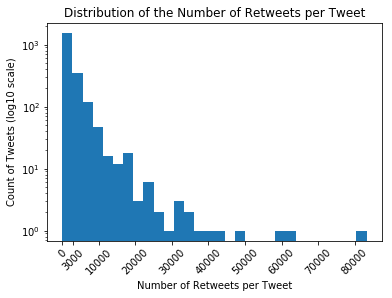

In [767]:
fig, ax = plt.subplots()
ax.set_yscale('log')
plt.title("Distribution of the Number of Retweets per Tweet")
plt.ylabel("Count of Tweets (log10 scale)")
plt.xlabel("Number of Retweets per Tweet")
plt.xticks([0,3000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000], rotation=45)
plt.hist(retweets_count, bins = 30);


The graph above shows the distributions of retweets with the count of tweets on a logarithmic scale base 10: differences in height are very significative, infact 50% of tweets are below 3069, as shown by the describe function. The distribution is skewed to the right, with a tail of tweets who have a very high number of retweets.
Let's see what is the 0.9 quantile, 90% of tweets will be below or at least equal to this value:

In [768]:
np.quantile(retweets_count, 0.90)

5992.4

90% of tweets has less than 5992 retweets, let's round this value to 6000 and plot the distribution.

In [769]:
under_6000 = np.array(twitter_main.retweet_count[twitter_main.retweet_count < 6000], dtype='int64')

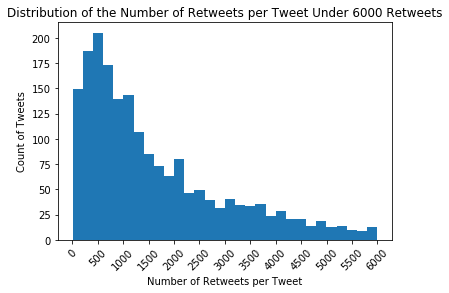

In [770]:
fig, ax = plt.subplots()
plt.title("Distribution of the Number of Retweets per Tweet Under 6000 Retweets")
plt.ylabel("Count of Tweets")
plt.xlabel("Number of Retweets per Tweet")
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,5500, 6000], rotation=45)
plt.hist(under_6000, bins = 30);


The graph above showing the number of retweets for tweets with less than 6000 retweets is as expected skewed to the right, with a peak aroun 500 retweets.

In [771]:
dogs_with_stage = twitter_main[twitter_main.dog_stage.notnull()]

In [772]:
dog_means = dogs_with_stage.groupby('dog_stage').retweet_count.mean().sort_values(ascending = False)

In [773]:
dog_means

dog_stage
puppo             6855.375000
doggo             6462.602740
doggo + pupper    4965.500000
floofer           3899.666667
pupper            2338.508929
Name: retweet_count, dtype: float64

In [774]:
dog_means_values = dog_means.values

In [775]:
dog_means_stage = dog_means.index

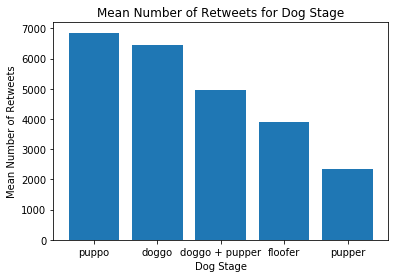

In [776]:
plt.title("Mean Number of Retweets for Dog Stage")
plt.xlabel("Dog Stage")
plt.ylabel("Mean Number of Retweets")
plt.bar(dog_means_stage, dog_means_values);

The graph above show the mean number of retweet for dog stage:doggo (adult dog), puppo( transitional phase between doggo and pupper, so a teenager dog), pupper (a puppy dog), floofer (generic term for furry and soft dogs) and "doggo + pupper" for tweets with images of both a doggo and a pupper. <br>
Puppo clearly wins the retweet challenge, being the most retweeted of the category, while pupper is the last.

### Insight 1:  the number of retweets is extremely variable, but most of tweets get less than about 3000 retweets.

The number of retweets of tweets on the WeRateDogs twitter account is extremely variable ranging from a minimum of 11 to a maximum of  83275, with a standard deviation of 4710 and an average of 2693. About 75% of the tweets get less than 3069 retweets. <br>
Dogs on WeRateDogs can be classified in  categories according to their stage in puppo, doggo floofer and pupper, but some of the picture contain both doggo and pupper (doggo + pupper). Puppo dogs (sort of teenager dogs) are only 24 in all the dataset, but they obtain on average the gretest number of retweets, 6855.

#### Number of favorites

Let's now look at the number of favorites per tweet.

In [777]:
twitter_main.favorite_count.describe()

count      2113.000000
mean       8727.725982
std       12668.738937
min          78.000000
25%        1940.000000
50%        3978.000000
75%       10888.000000
max      163767.000000
Name: favorite_count, dtype: float64

The mean number of favorites is three times bigger than the mean number of retweets for WerRateDogs tweets (a very common pattern on twitter).

In [778]:
### 90th quantile, 90% of of the number of favorites will be under this value or equal to it.
print(np.quantile(twitter_main.favorite_count, 0.9))

22079.800000000003


90% of tweets will have less than about 22080 favorites.

In [779]:
favorites_90 = twitter_main[twitter_main.favorite_count < 22080]

In [780]:
favorites_count_90 = np.array(favorites_90.favorite_count, dtype='int64')

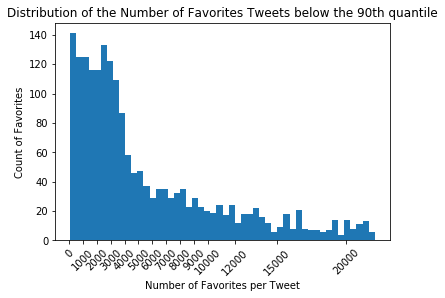

In [781]:
fig, ax = plt.subplots()
plt.title("Distribution of the Number of Favorites Tweets below the 90th quantile")
plt.ylabel("Count of Favorites")
plt.xlabel("Number of Favorites per Tweet")
plt.xticks([0, 1000, 2000,3000, 4000, 5000,6000,7000,8000,9000, 10000,12000, 15000, 20000], rotation=45)
plt.hist(favorites_count_90, bins = 50);

The plot above show the distribution of favorites for 90% of the tweets: the distribution is clearly skewed to the right,
with most of tweets receiving less than 4000 rewteets.

In [782]:
dog_means_favorite = dogs_with_stage.groupby('dog_stage').favorite_count.mean().sort_values(ascending = False)

In [783]:
dog_means_favorite

dog_stage
puppo             22722.208333
doggo             18556.534247
doggo + pupper    15232.833333
floofer           10579.444444
pupper             7011.660714
Name: favorite_count, dtype: float64

In [784]:
dog_means_fav_values = dog_means_favorite.values

In [785]:
dog_means_fav_stage = dog_means_favorite.index

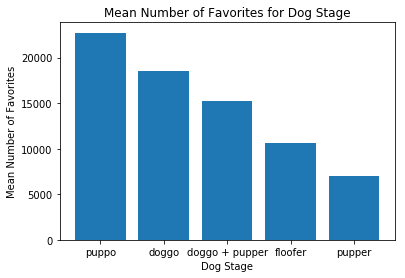

In [786]:
plt.title("Mean Number of Favorites for Dog Stage")
plt.xlabel("Dog Stage")
plt.ylabel("Mean Number of Favorites")
plt.bar(dog_means_fav_stage, dog_means_fav_values);

The plot above shows the number of favorites for dog stage, the puppo category is again the winner followed by doggo.

### Insight 2: the number of favorites per tweet is on average higher than the number of retweets, but it is again extremely variable. Puppo dogs are favorite stars on WeRateDogs.

The number of favorites per tweet on WeRateDogs ranges from a minimum of 78 to a maximum of 163767 with a considerable standard deviation of  about 12669 and a mean of about 8728. If the number of retweets if very variable from tweet to tweet the number of favorites is even more variable. Puppo dogs are again the favorites between favorites and they get on average  22722 favorites, neatly over the average of the entire dataset.

#### Dog or not dog?

The twitter_main dataframe contains predictions about the possibility that an image associated with a tweet is really a dog or not. Some of the users can post tweets that aren't really dogs, but do they get more or less favorites and retweets respect to probably real dogs? We are going to find it. <br>
For this analysis I'll combine all the predictions in p1_dog, p2_dog and p3_dog and I'll consider their sum: three predictions of True for being a dog will be equal to 3, while three predictions of False will be equal to zero.

In [787]:
dog_predictions = twitter_main[twitter_main.p1.notnull()]

In [788]:
dog_predictions['dog_sum'] = dog_predictions.p1_dog + dog_predictions.p2_dog + dog_predictions.p3_dog

C:\Users\Tundra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [789]:
retweet_predictions_mean = dog_predictions.groupby('dog_sum').retweet_count.mean().sort_values(ascending = False)
retweet_predictions_mean

dog_sum
2    2902.542945
1    2804.382166
3    2615.250000
0    2351.837134
Name: retweet_count, dtype: float64

In [790]:
retweet_pred_values = retweet_predictions_mean.values
retweet_pred_sum = retweet_predictions_mean.index

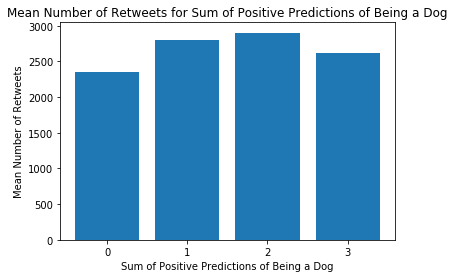

In [791]:
plt.title("Mean Number of Retweets for Sum of Positive Predictions of Being a Dog")
plt.xlabel("Sum of Positive Predictions of Being a Dog")
plt.xticks([0, 1, 2, 3])
plt.ylabel("Mean Number of Retweets")
plt.bar(retweet_pred_sum,retweet_pred_values);
plt.show()

The plot above shows the mean number of rewteewts for sum of positive predictions about the image in a tweet being really of a dog. As expected a sum of zero (so three predictions of not being a dog) corresponds to the lowest number of retweets, but instead three predictions of being a dog don't get the highest number of retweet, the winner is a prediction of two: so probably a picture of a dog, but maybe the picture contains something else that isn't a dog.

In [792]:
favorite_predictions_mean = dog_predictions.groupby('dog_sum').favorite_count.mean().sort_values(ascending = False)
favorite_predictions_mean

dog_sum
2    9132.969325
3    9045.361667
1    8741.503185
0    6833.127036
Name: favorite_count, dtype: float64

In [793]:
fav_pred_values = favorite_predictions_mean.values
fav_pred_sum = favorite_predictions_mean.index

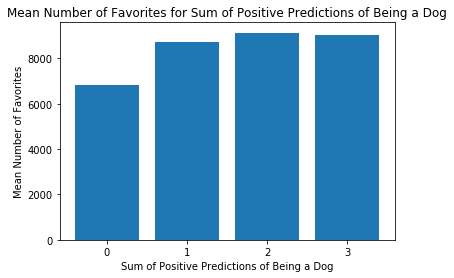

In [794]:
plt.title("Mean Number of Favorites for Sum of Positive Predictions of Being a Dog")
plt.xlabel("Sum of Positive Predictions of Being a Dog")
plt.xticks([0, 1, 2, 3])
plt.ylabel("Mean Number of Favorites")
plt.bar(fav_pred_sum,fav_pred_values);
plt.show()

The plot above shows the mean number of favorites for sum of positive predictions for an image of being of a dog. Again three predictions of not being a dog have the lowest number of retweets, but the highest number of retweets is obtained by picture thar are probably of a dog, but proably contain something else that isn't a dog.

### Insight 3: The most probable dog isn't always the most probable favorite or the most retweeted, but pictures that are probably something different from dogs are the less ones.

Some of the images in tweets on WeRateDogs has been analyzed by a neural network in order to be classified and at every image is associated with three predictions about its content and the probability of being a dog.<br>
Every image could get three verdicts of being a dog, one for every possible content according to the neural network. <br>
Not every image posted on WeRateDogs is really of a dog: sometimes it is of other animals, but it can also be of whatever nature (even a fan), but they get scores, retweets and rates nonetheless. <br>
In theory pictures classified as almost certainly as dogs (three classifications as dog) should have greater success on average than pictures of only partially classified as dogs (2 predictions of being a dog on 3 in total), getting more retweets and favorites, but instead the tweets with the average greatest success are the one with a total number of predictions of being  a dog of 2 (even if they are very similar in average retweets to the ones with a 3 classifications as dog, 2902 versus 2804 retweets and 9133 versus 9045 favorites).<br>
Sometimes pictures contain not only a dog, but something else that is very visible near the dog and that is classified by the neural network as the possible main content of the picture: maybe that something else gives the dog the right "light" to be noticed by twitter users (this is only a theory!) in pictures that get only 2 predictions of being a dog. <br>
As expected, picture that are most probably not a dog, with zero predictions of being a dog, get the less retweets and favorites of all on average.

#### Do dog with high scores get more retweets and favorites?

A well know proverb says "beauty is in the eye of the beholder", but are WeRateDogs dog owners good judge of their dogs? Or, in other and more statistical words, is the score given to the dog correlated to the number of favorites and retweets?
Let's find it.

In [795]:
scores = np.array(twitter_main.dog_score, dtype ='int64')

In [796]:
favorites_count = np.array(twitter_main.favorite_count, dtype="int64")

In [797]:
### correlation coefficient matrix for scores and number of retweets
print(np.corrcoef(scores, retweets_count))

[[1.         0.01613878]
 [0.01613878 1.        ]]


In [798]:
### correlation coefficient matrix for scores and number of favorites
print(np.corrcoef(scores, favorites_count))

[[1.         0.01536455]
 [0.01536455 1.        ]]


In [799]:
### correlation coefficient matrix for number of retweets and number of favorites
print(np.corrcoef(retweets_count, favorites_count))

[[1.         0.92703912]
 [0.92703912 1.        ]]


There is nearly no correlation betweet the number of retweets and the score given to dogs and no correlation again between the number of favorites and the score given to dogs. There is instead a strong correlation, as expected, between favorites and retweets.

#### Insight 4: the scores given to dogs aren't correlated to the number of retweets and favourites

No matter how much good or bad are the scores given to the dogs, the number of retweets and favorites aren't correlated to the scores: the pearson correlation coefficient between number of retweets and score is 0.016 and between favorites and score it is 0.015, so very near to zero. It seems brave and good dogs need to earn their success on their own!